In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2025-07-30 09:45:58.792986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-30 09:45:58.793021: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-30 09:45:58.833024: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-30 09:45:58.891352: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
classes = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

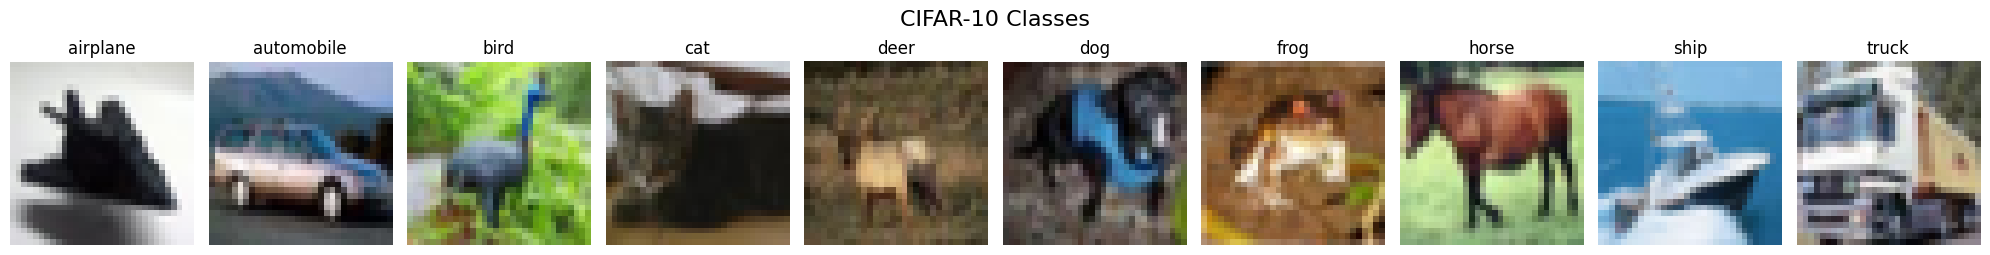

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))

for i in range(10):
    image = x_train[y_train.flatten() == i]
    axs[i].imshow(image[0])
    axs[i].set_title(classes[i])
    axs[i].axis('off')

plt.tight_layout()
plt.suptitle('CIFAR-10 Classes', fontsize=16)

plt.show()

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten

IMG_SHAPE = (32, 32, 3)

base_model = tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=IMG_SHAPE,)

predictions = Flatten()(base_model.output)
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

2025-07-30 09:47:31.413202: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-30 09:47:31.599111: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-07-30 09:47:31.599523: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [6]:
benchmark_layers = model.layers
benchmark_input = model.input

layer_outputs_benchmark = [layer.output for layer in benchmark_layers]
features_benchmark = Model(inputs=benchmark_input, outputs=layer_outputs_benchmark)

In [7]:
# Extract features from the 10th layer (index 9) for all training images
X = np.array([np.array(features_benchmark(i[np.newaxis,...])[175])[0] for i in x_train])
X.shape

2025-07-30 09:48:24.942901: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


(50000, 2048)

In [8]:
# Perform PCA on the extracted features
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
data_pca = pca.transform(X)

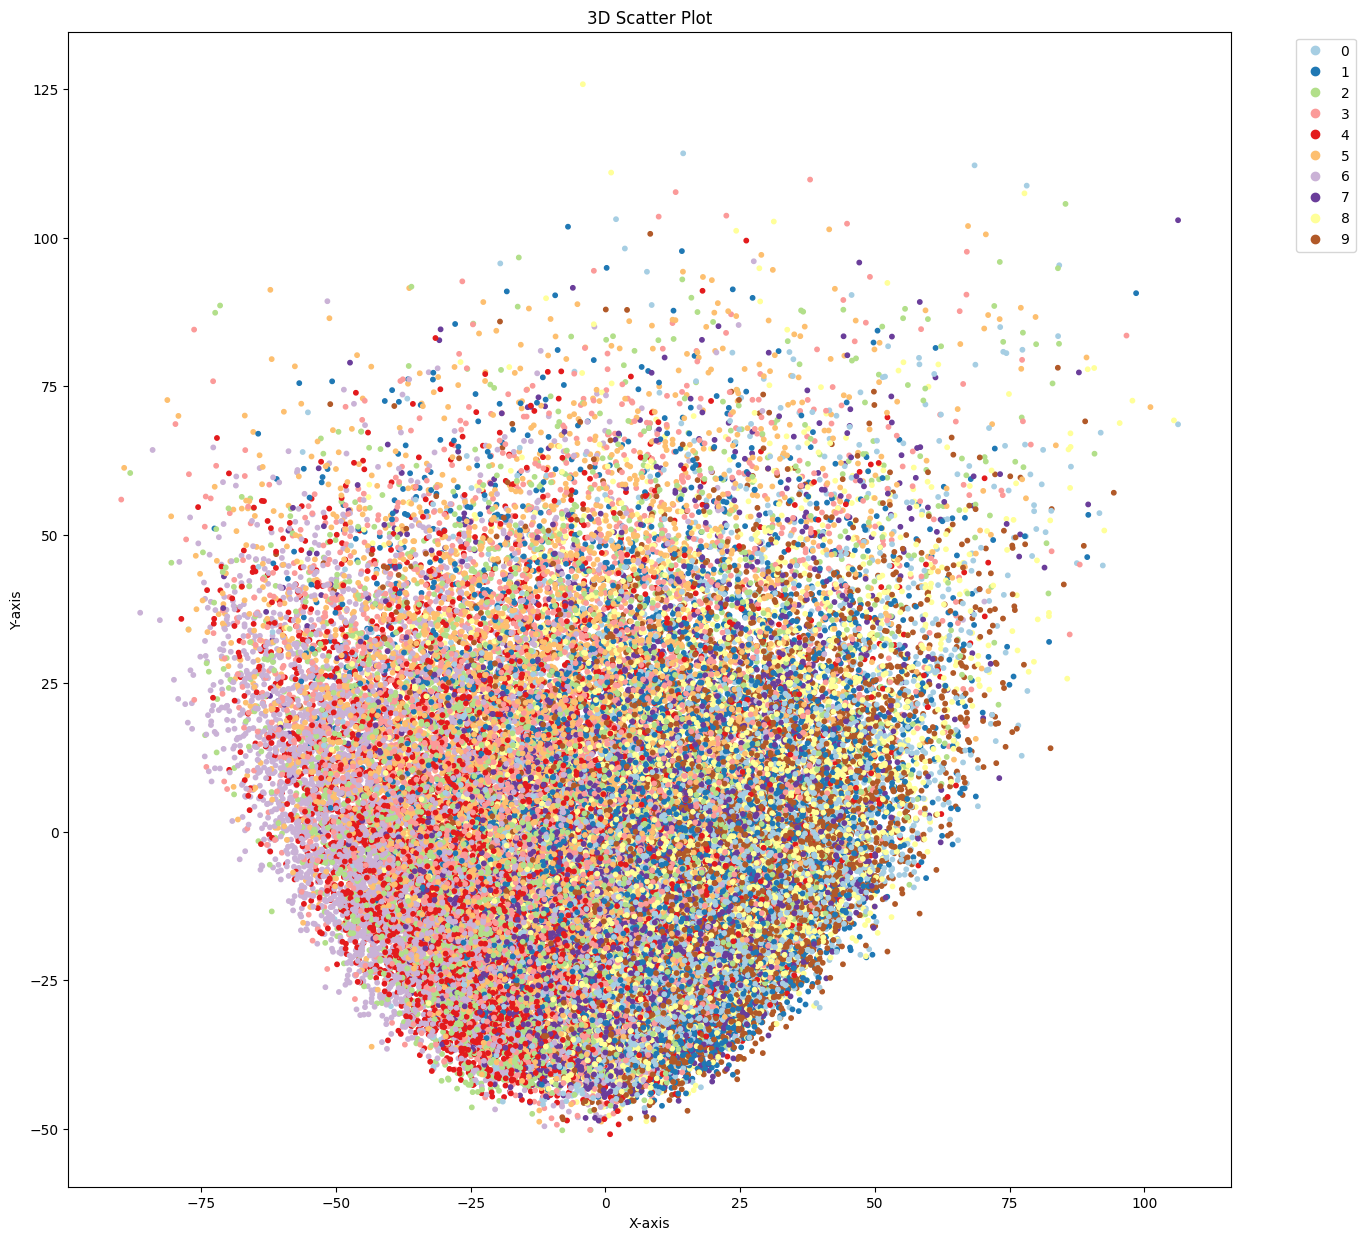

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

d = {'x': data_pca[:,0], 'y': data_pca[:,1]}
df = pd.DataFrame(data=d)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sc = ax.scatter(df['x'], df['y'], c=y_train, cmap='Paired', s=10, alpha=1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('3D Scatter Plot')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_training_reduced_tsne = tsne.fit_transform(X)

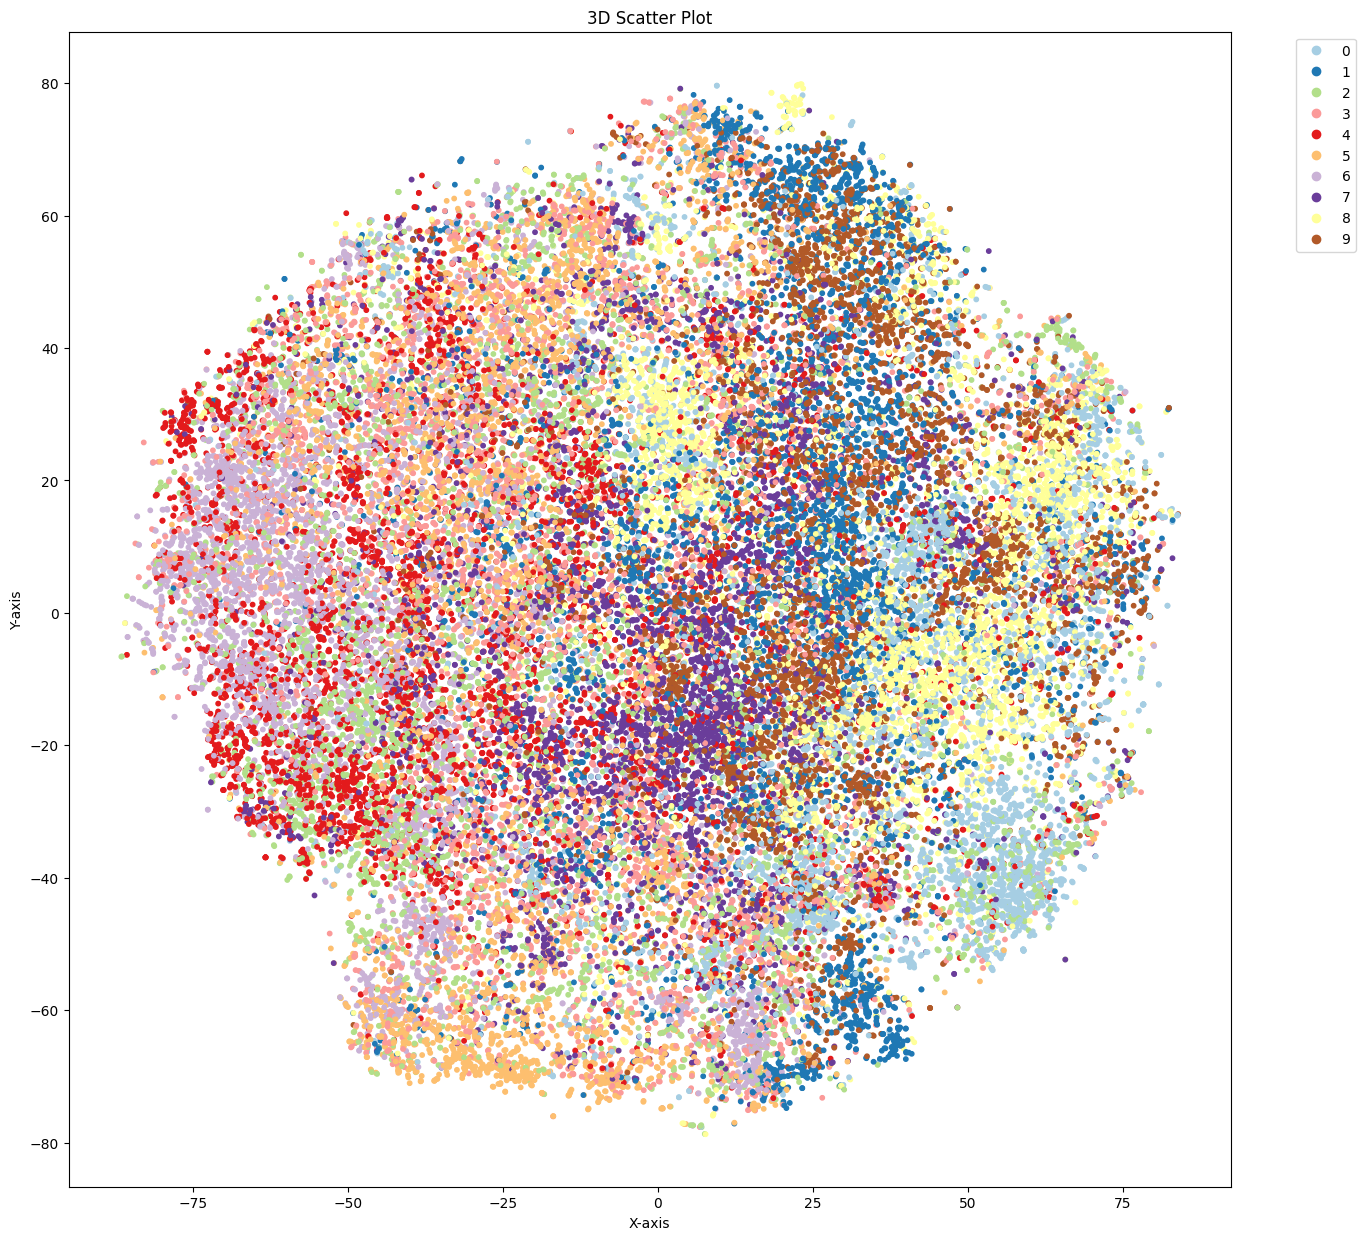

In [11]:
d = {'x': X_training_reduced_tsne[:,0], 'y': X_training_reduced_tsne[:,1]}
df = pd.DataFrame(data=d)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sc = ax.scatter(df['x'], df['y'], c=y_train, cmap='Paired', s=10, alpha=1)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('3D Scatter Plot')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()